In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_data=pd.read_csv('Titanic_train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#first fill missing values of embarked 

In [9]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [10]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [11]:
# also filling missing value for 'Age'

In [12]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

In [13]:
# cabin colum is not needed so drop it

In [14]:
titanic_data.drop(columns='Cabin',inplace =True)

In [15]:
titanic_data.isnull().sum() #no nan values 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# Creating a new feature

In [17]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

In [18]:
# dividing 'Sex' colum as per 'Age' .age<15 are child age> are( male/ female)

In [19]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [20]:
titanic_data[titanic_data.Age<=15].shape

(83, 13)

In [21]:
titanic_data[titanic_data.Age<=15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [22]:
titanic_data[titanic_data.Age>15].shape

(808, 13)

In [23]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


In [24]:
# converting categorical data of into numerical

In [25]:
titanic_data1=pd.get_dummies(titanic_data,columns=['GenderClass','Embarked'],drop_first=True,dtype='int')

In [26]:
titanic_data1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,0,1


In [27]:
titanic=titanic_data1.drop(columns=['Name','Ticket','Sex','SibSp','Parch'],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


# Visualization

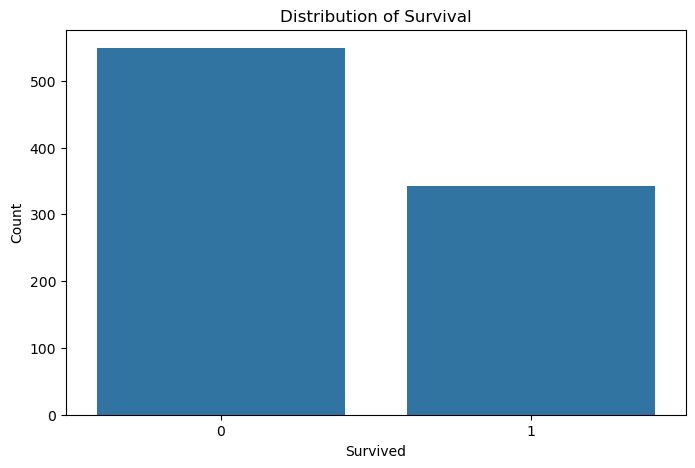

In [29]:
# Plot the distribution of the target variable 'Survived'
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


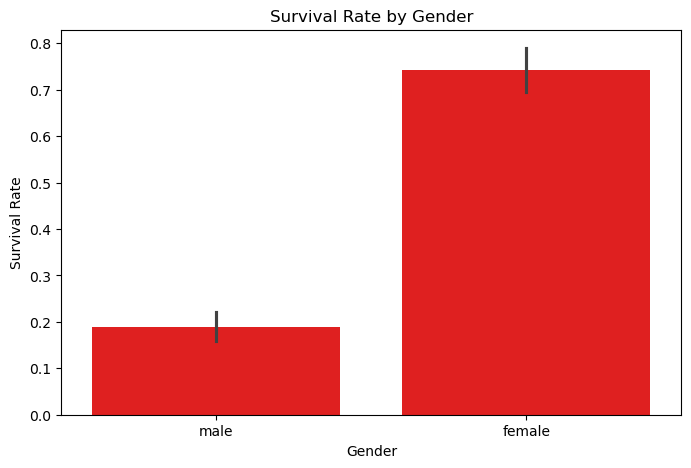

In [30]:
# Survival by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived',color='r', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


<Axes: xlabel='Survived', ylabel='count'>

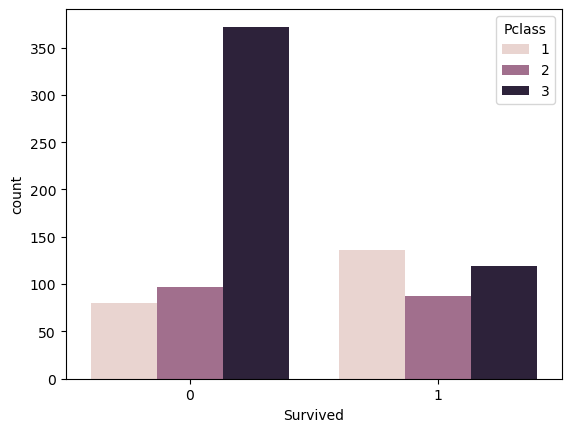

In [31]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

# Histogram

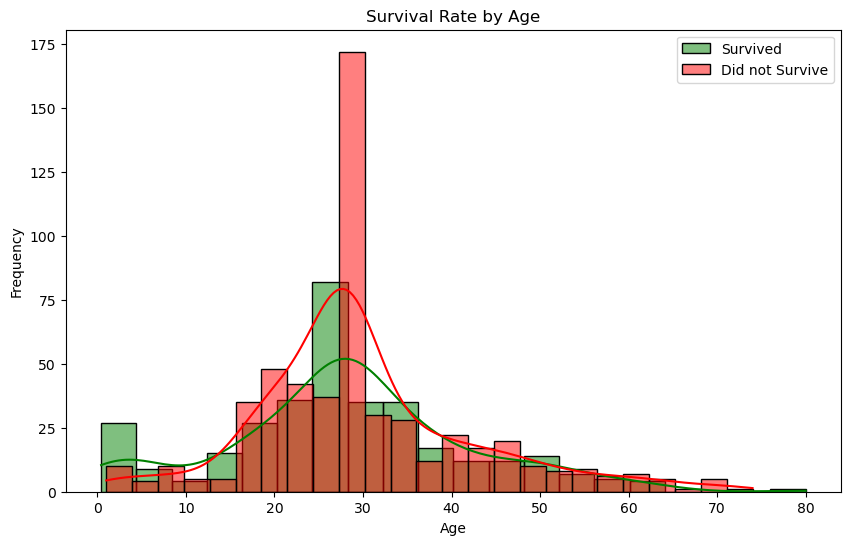

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Age'], kde=True, color='red'  , label='Did not Survive')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

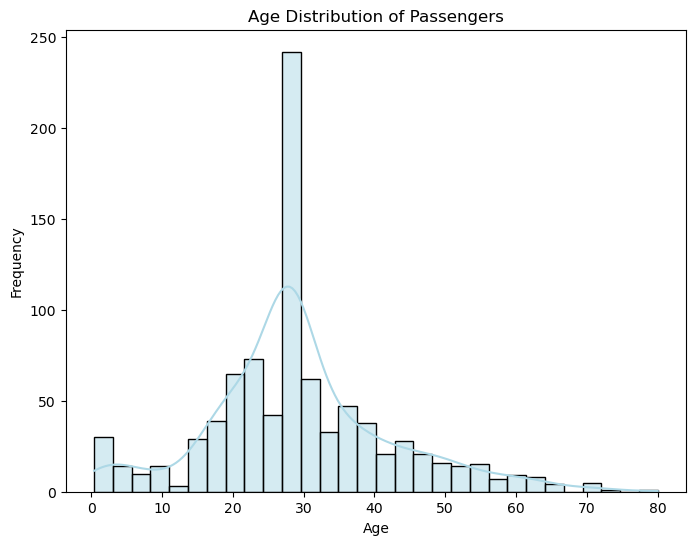

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], kde=True, color='lightblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

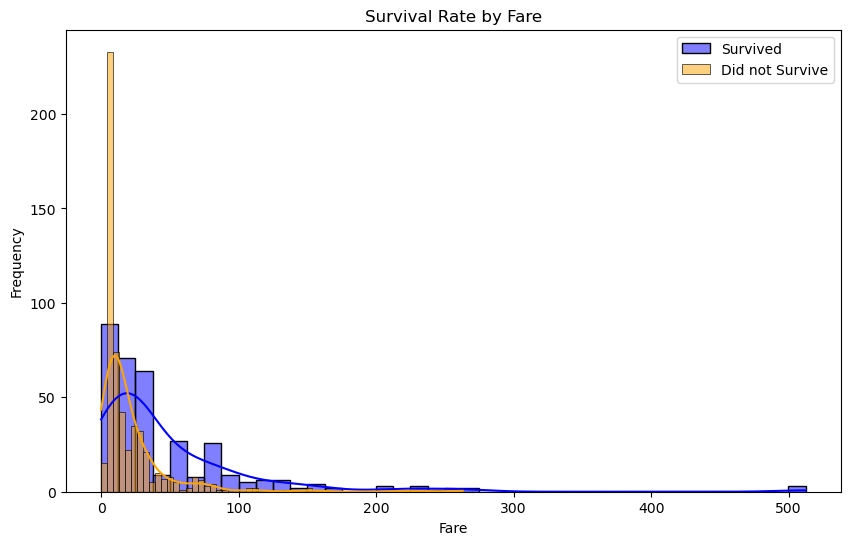

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Fare'], kde=True, color='blue', label='Survived')
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Fare'], kde=True, color='orange', label='Did not Survive')
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

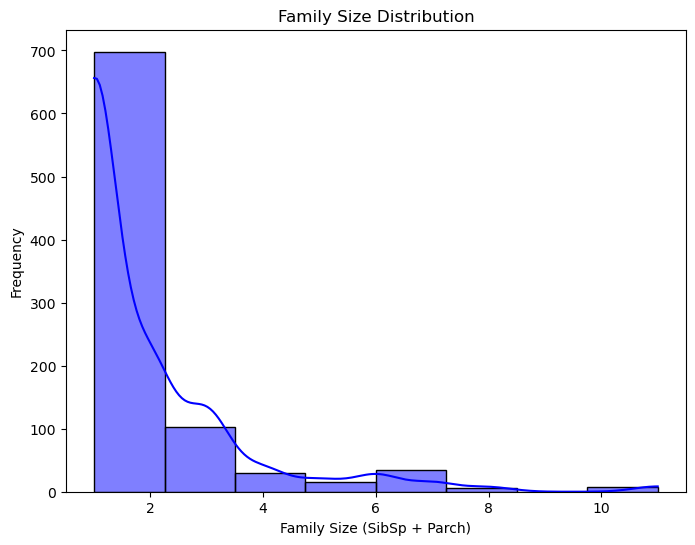

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['FamilySize'], kde= True, bins=8, color='blue')
plt.title('Family Size Distribution')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Frequency')
plt.show()

# BoxPlot

<Axes: xlabel='Pclass', ylabel='Age'>

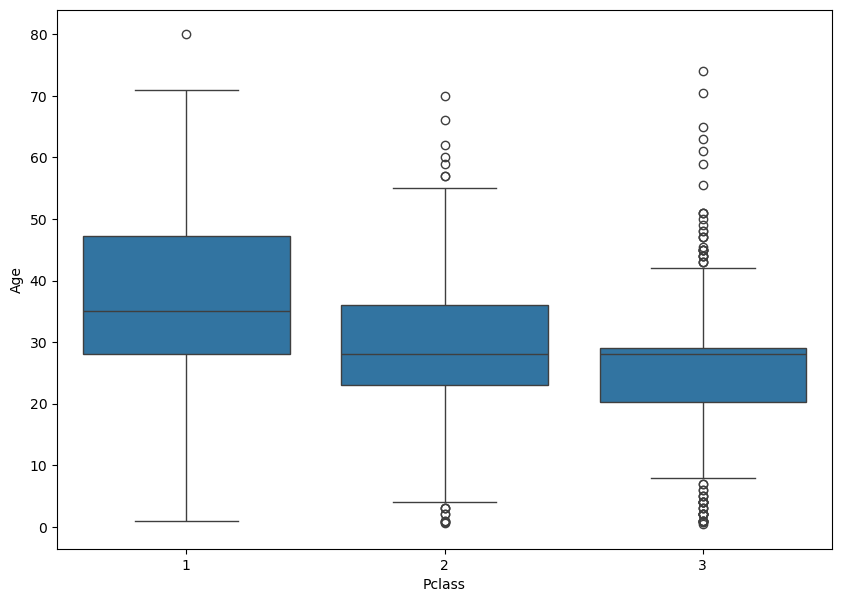

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

# Pair Plot

In [40]:
#  Drawaing Pair Plot to know relation betn fare,age,pclass ,survived

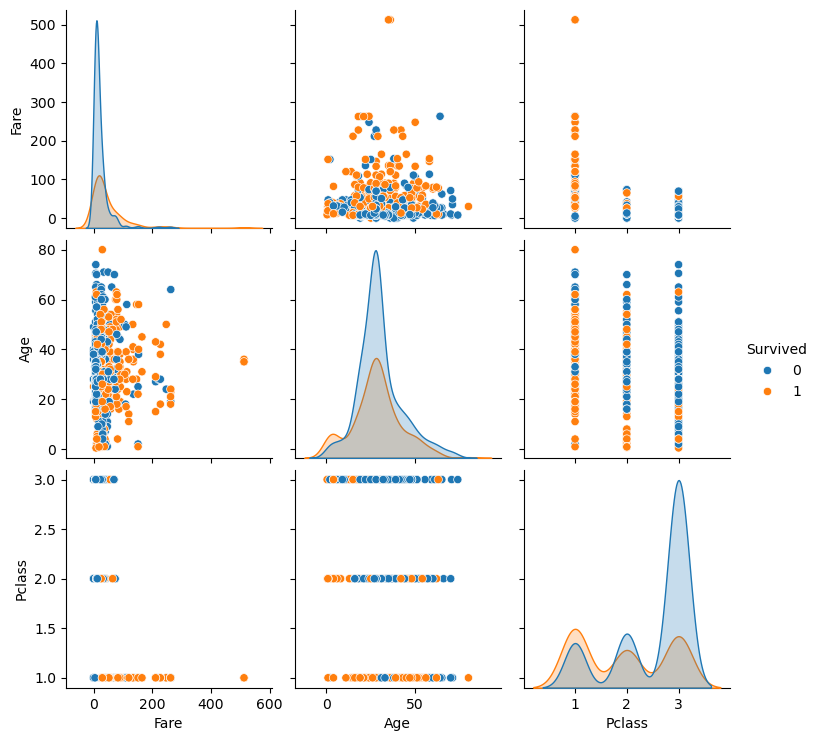

In [41]:
sns.pairplot(titanic_data[['Fare','Age','Pclass','Survived']],vars=['Fare','Age','Pclass'],hue='Survived',dropna=True)

# Coorelation between all features using HeatMap

In [43]:
# Establioshing Coorelation between all features using Heatmap

Text(0.5, 1.0, 'Correlation between features')

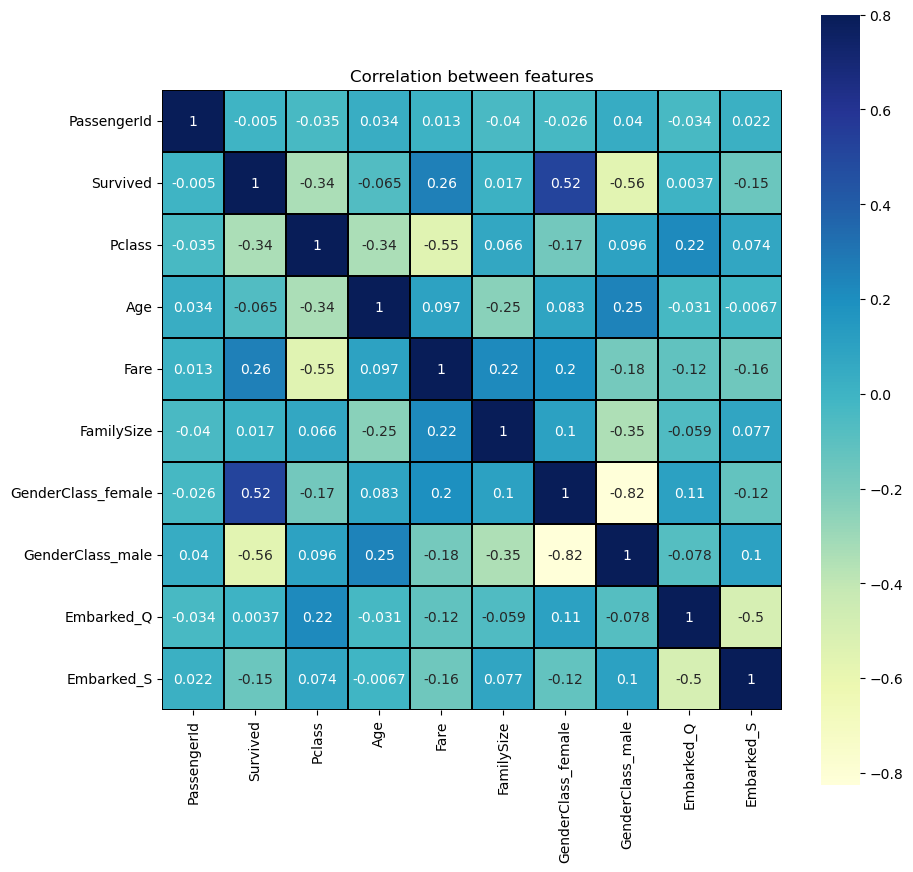

In [44]:
corr = titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

# LOGISTIC REGRESSION

In [46]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [47]:
target=titanic['Survived']

In [48]:
features=titanic.drop(columns='Survived')
features.head(3)

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1


In [49]:
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=100,train_size=0.75)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 9)
(223, 9)
(668,)
(223,)


In [51]:
log_reg=LogisticRegression()

In [52]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred=log_reg.predict(x_test)

In [54]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred)

0.7802690582959642

In [56]:
log_reg.coef_

array([[-7.33167796e-05, -8.98551611e-01, -9.03321950e-03,
         8.34208119e-03, -2.51422901e-01,  1.07173445e+00,
        -2.16560102e+00, -4.56224255e-01,  2.86976419e-01]])

In [57]:
# Our model is 78% accurate using Logistic Regression model

# Confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
conf=confusion_matrix(y_test,y_pred)
print(conf)

[[114  13]
 [ 36  60]]


In [61]:
# check confusion matrix using heatmap

Text(0.5, 1.0, 'Confusion_Matrix')

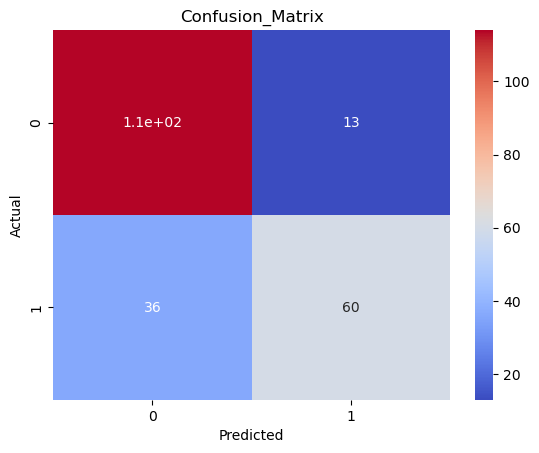

In [62]:
sns.heatmap(conf,annot=True,cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion_Matrix')

In [63]:
# lets create a datframe of confusion matrix

In [64]:
df=pd.DataFrame(conf)

In [65]:
df.index = ['Actual Died','Actual Survived']
df.columns = ['Predicted Died','Predicted Survived']
print(df)

                 Predicted Died  Predicted Survived
Actual Died                 114                  13
Actual Survived              36                  60


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       127
           1       0.82      0.62      0.71        96

    accuracy                           0.78       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.78      0.77       223



# ROC Curve

In [68]:
from sklearn.metrics import roc_auc_score,roc_curve

In [69]:
logistic_probability=log_reg.predict_log_proba(x_test)[:,1]
logistic_probability

array([-0.83781499, -0.62298628, -2.55231763, -0.20162307, -1.8197821 ,
       -0.35326628, -2.82824033, -1.17725458, -0.02720746, -0.72618495,
       -0.01610426, -2.4878451 , -1.91354659, -0.48886278, -1.29700443,
       -2.77007457, -0.10282133, -1.02829566, -0.52049195, -2.4801633 ,
       -2.55167163, -0.03655823, -2.46040814, -0.36124972, -2.51229075,
       -2.54440365, -0.28567151, -1.28480664, -2.60049051, -3.15209893,
       -4.45280658, -0.18554429, -0.97735387, -1.72932326, -0.05855884,
       -2.77607603, -0.49776542, -0.03344353, -0.2169911 , -2.51925059,
       -0.43419742, -0.04164389, -1.9207369 , -1.11876403, -4.44976319,
       -0.46772292, -2.46454216, -0.05040966, -1.91290398, -0.08712768,
       -2.42525531, -1.71972543, -2.02184632, -2.55319843, -2.9082583 ,
       -2.45503376, -2.59106032, -3.14866733, -1.06086013, -1.00286569,
       -1.78212861, -0.46807635, -2.49974863, -3.26688358, -1.71487152,
       -0.3516061 , -2.49531264, -0.41335555, -0.18842623, -2.62

In [70]:
roc_auc_score(y_test,logistic_probability)

0.8257053805774279

In [71]:
roc_curve(y_test,logistic_probability)

(array([0.        , 0.        , 0.        , 0.00787402, 0.00787402,
        0.01574803, 0.01574803, 0.02362205, 0.02362205, 0.04724409,
        0.04724409, 0.05511811, 0.05511811, 0.07086614, 0.07086614,
        0.07874016, 0.07874016, 0.08661417, 0.08661417, 0.09448819,
        0.09448819, 0.1023622 , 0.1023622 , 0.11811024, 0.11811024,
        0.13385827, 0.13385827, 0.14173228, 0.14173228, 0.1496063 ,
        0.1496063 , 0.15748031, 0.15748031, 0.16535433, 0.16535433,
        0.17322835, 0.17322835, 0.22834646, 0.22834646, 0.2519685 ,
        0.2519685 , 0.25984252, 0.25984252, 0.39370079, 0.39370079,
        0.42519685, 0.42519685, 0.45669291, 0.45669291, 0.51181102,
        0.51181102, 0.59055118, 0.59055118, 0.60629921, 0.60629921,
        0.66929134, 0.66929134, 0.69291339, 0.69291339, 0.77165354,
        0.77165354, 0.80314961, 0.80314961, 0.92125984, 0.92125984,
        0.94488189, 0.94488189, 0.95275591, 0.95275591, 0.96062992,
        0.96062992, 0.97637795, 0.97637795, 1.  

In [72]:
# visualize roc curve

In [73]:
fpr,tpr,threshold=roc_curve(y_test,logistic_probability)

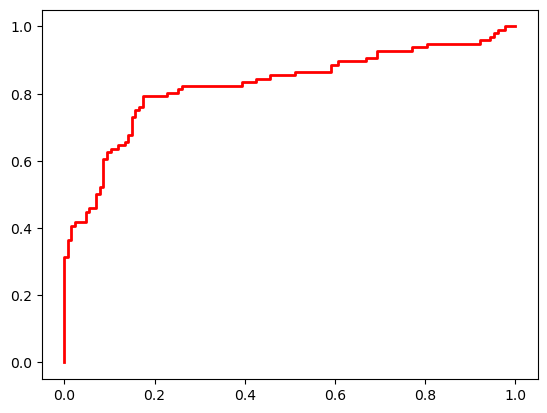

In [74]:
plt.plot(fpr,tpr,lw=2,color='red')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


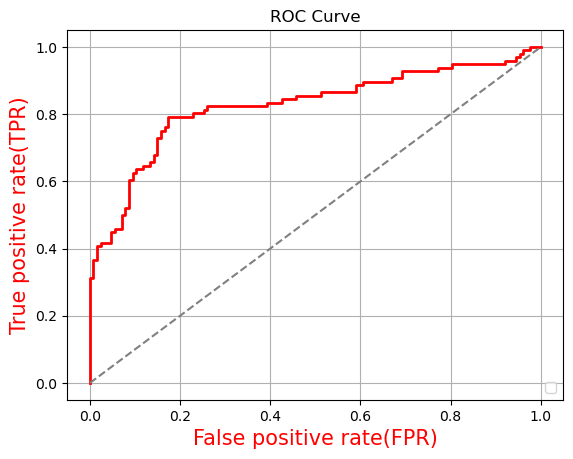

In [75]:
plt.plot(fpr,tpr,lw=2,color='red')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--',color='grey') #to draw gret line
plt.title('ROC Curve')
plt.xlabel('False positive rate(FPR)',color='red',size=15)
plt.ylabel('True positive rate(TPR)',color='red',size=15)
plt.grid()

# deployment using Streamlit

In [155]:
import pickle

In [157]:
with open("titanic_model.pkl", "wb") as file:
    pickle.dump(log_reg, file)

# Interview Questions

# 1. What is the difference between precision and recall?# 
2. What is cross-validation, and why is it important in binary classification?



# 1. What is the difference between precision and recall?

## Precision and Recall are evaluation metrics for classification models, especially in scenarios involving imbalanced datasets or critical decision-making (e.g., medical diagnoses, fraud detection). They focus on different aspects of a classifier's performance.Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.

## Precision:
### In the simplest terms, Precision is the ratio between the True Positives and all the Positives. 
### Precision measures how many of the predicted positive instances are actually positive.
### High precision means fewer false positives.

## Recall:
### Recall (also known as sensitivity or true positive rate) measures how many of the actual positive instances are correctly identified.
### The recall is the measure of our model correctly identifying True Positives.
### High recall means fewer false negatives.

### Precision and recall are two evaluation metrics used to measure the performance of a classifier in binary and multiclass classification problems.

### Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.

### High precision and high recall are desirable, but there may be a trade-off between the two metrics in some cases.

### Precision and recall should be used together with other evaluation metrics, such as accuracy and F1-score, to get a comprehensive understanding of the performance of a classifier